In [ ]:
# Source: Gemini
# prompt: Generate code for extracting files from a google drive folder in My Drive/DMP. These are python files that I would like to use in the notebook

import os
from google.colab import drive

drive.mount('/content/drive')

# Specify the path to your folder in Google Drive
folder_path = '/content/drive/My Drive/DMP'

# Check if the folder exists
if os.path.exists(folder_path):
  # Get a list of all files in the folder
  files = os.listdir(folder_path)

  # Iterate through the files
  for file in files:
    # Check if the file is a Python file
    if file.endswith(".py"):
      # Construct the full path to the file
      file_path = os.path.join(folder_path, file)

      # Copy the file to the current working directory of the Colab notebook
      !cp "{file_path}" .

      print(f"Copied {file} to the current directory.")

else:
  print(f"Error: The folder '{folder_path}' does not exist.")


Mounted at /content/drive
Copied pDMP_example.py to the current directory.
Copied pDMP_functions.py to the current directory.


Text(0.5, 1.0, 'Periodic DMP Sine')

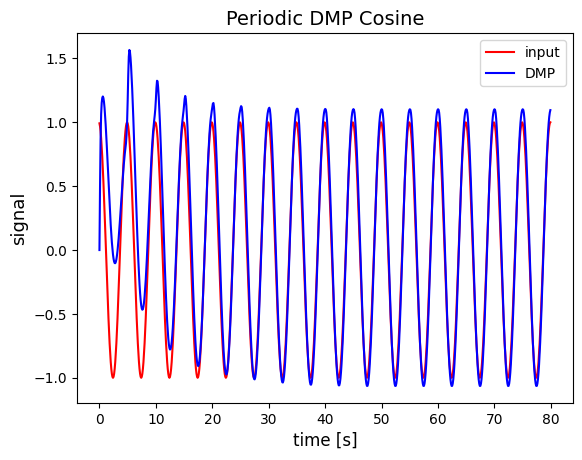

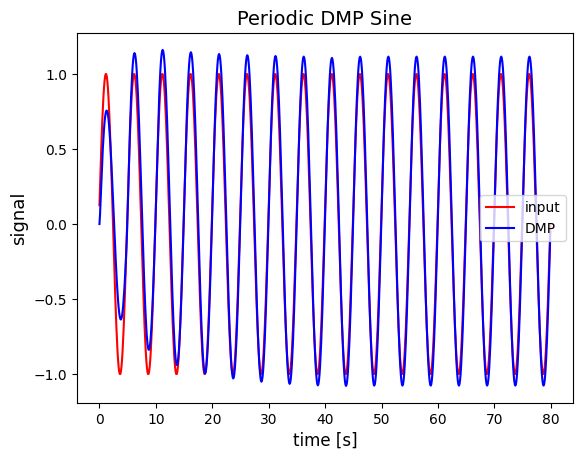

In [ ]:
# @title
"""
PERIODIC DYNAMIC MOVEMENT PRIMITIVES (pDMP)

An example of how to use pDMP functions.


AUTHOR: Luka Peternel
e-mail: l.peternel@tudelft.nl


REFERENCE:
L. Peternel, T. Noda, T. Petrič, A. Ude, J. Morimoto and J. Babič
Adaptive control of exoskeleton robots for periodic assistive behaviours based on EMG feedback minimisation,
PLOS One 11(2): e0148942, Feb 2016

"""

import numpy as np
import matplotlib.pyplot as plt
from pDMP_functions import pDMP




# EXPERIMENT PARAMETERS
dt = 0.1 # system sample time
exp_time = 80 # total experiment time
samples = int(1/dt) * exp_time

DOF = 4 # degrees of freedom (number of DMPs to be learned)
N = 25 # number of weights per DMP (more weights can reproduce more complicated shapes)
alpha = 8 # DMP gain alpha
beta = 2 # DMP gain beta
lambd = 0.995 # forgetting factor
tau = 5 # DMP time period = 1/frequency (NOTE: this is the frequency of a periodic DMP)
phi = 0 # DMP phase

mode = 1 # DMP mode of operation (see below for details)

y_old = 0
dy_old = 0

data = []
data2 = []
# create a DMP object
myDMP = pDMP(DOF, N, alpha, beta, lambd, dt)




# MAIN LOOP
for i in range ( samples ):

    # generate phase
    phi += 2*np.pi * dt/tau

    # generate an example trajectory (e.g., the movement that is to be learned)
    y = np.array([np.sin(phi), np.cos(phi), -np.sin(phi), -np.cos(phi)])
    # calculate time derivatives
    dy = (y - y_old) / dt
    ddy = (dy - dy_old) / dt

    # generate an example update (e.g., EMG singals that update exoskeleton joint torques as in [Peternel, 2016])
    U = 10*y # typically update factor is an input signal multiplied by a gain

    # set phase and period for DMPs
    myDMP.set_phase( np.array([phi,phi,phi,phi]) )
    myDMP.set_period( np.array([tau,tau,tau,tau]) )



    # DMP mode of operation
    if i < int( 0.5 * samples ): # learn/update for half of the experiment time, then repeat that DMP until the end
        if( mode == 1 ):
            myDMP.learn(y, dy, ddy) # learn DMP based on a trajectory
        elif ( mode == 2 ):
            myDMP.update(U) # update DMP based on an update factor
    else:
        myDMP.repeat() # repeat the learned DMP

    # DMP integration
    myDMP.integration()


    # old values
    y_old = y
    dy_old = dy

    # store data for plotting
    x, dx, ph, ta = myDMP.get_state()
    time = dt*i
    data.append([time,phi,x[1],y[1]])
    data2.append([time,phi,x[0],y[0]])




# PLOTS
data = np.asarray(data)
data2 = np.asarray(data2)
# input
plt.figure(1)
plt.plot(data[:,0],data[:,3],'r')
# DMP
plt.plot(data[:,0],data[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Cosine', fontsize='14')
plt.figure(2)

# input
plt.plot(data2[:,0],data2[:,3],'r')
# DMP
plt.plot(data2[:,0],data2[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Sine', fontsize='14')

Text(0.5, 1.0, 'Periodic DMP Sine')

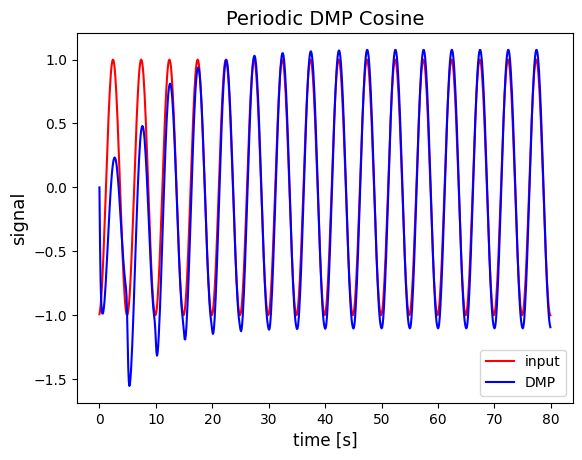

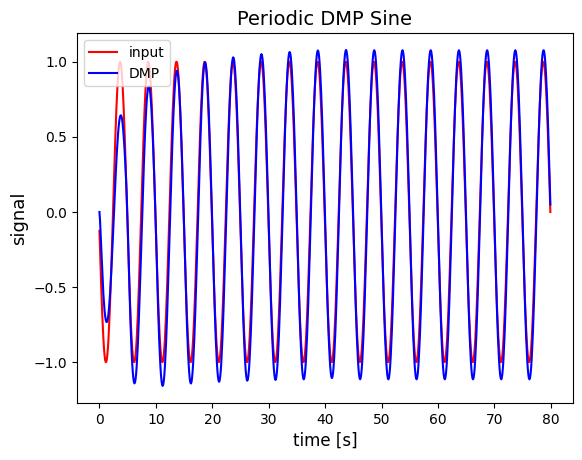

In [ ]:
# phi changed to pi

import numpy as np
import matplotlib.pyplot as plt
from pDMP_functions import pDMP




# EXPERIMENT PARAMETERS
dt = 0.1 # system sample time
exp_time = 80 # total experiment time
samples = int(1/dt) * exp_time

DOF = 4 # degrees of freedom (number of DMPs to be learned)
N = 25 # number of weights per DMP (more weights can reproduce more complicated shapes)
alpha = 8 # DMP gain alpha
beta = 2 # DMP gain beta
lambd = 0.995 # forgetting factor
tau = 5 # DMP time period = 1/frequency (NOTE: this is the frequency of a periodic DMP)
phi = np.pi # DMP phase

mode = 1 # DMP mode of operation (see below for details)

y_old = 0
dy_old = 0

data = []
data2 = []
# create a DMP object
myDMP = pDMP(DOF, N, alpha, beta, lambd, dt)




# MAIN LOOP
for i in range ( samples ):

    # generate phase
    phi += 2*np.pi * dt/tau

    # generate an example trajectory (e.g., the movement that is to be learned)
    y = np.array([np.sin(phi), np.cos(phi), -np.sin(phi), -np.cos(phi)])
    # calculate time derivatives
    dy = (y - y_old) / dt
    ddy = (dy - dy_old) / dt

    # generate an example update (e.g., EMG singals that update exoskeleton joint torques as in [Peternel, 2016])
    U = 10*y # typically update factor is an input signal multiplied by a gain

    # set phase and period for DMPs
    myDMP.set_phase( np.array([phi,phi,phi,phi]) )
    myDMP.set_period( np.array([tau,tau,tau,tau]) )



    # DMP mode of operation
    if i < int( 0.5 * samples ): # learn/update for half of the experiment time, then repeat that DMP until the end
        if( mode == 1 ):
            myDMP.learn(y, dy, ddy) # learn DMP based on a trajectory
        elif ( mode == 2 ):
            myDMP.update(U) # update DMP based on an update factor
    else:
        myDMP.repeat() # repeat the learned DMP

    # DMP integration
    myDMP.integration()


    # old values
    y_old = y
    dy_old = dy

    # store data for plotting
    x, dx, ph, ta = myDMP.get_state()
    time = dt*i
    data.append([time,phi,x[1],y[1]])
    data2.append([time,phi,x[0],y[0]])




# PLOTS
data = np.asarray(data)
data2 = np.asarray(data2)
# input
plt.figure(1)
plt.plot(data[:,0],data[:,3],'r')
# DMP
plt.plot(data[:,0],data[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Cosine', fontsize='14')
plt.figure(2)

# input
plt.plot(data2[:,0],data2[:,3],'r')
# DMP
plt.plot(data2[:,0],data2[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Sine', fontsize='14')

Text(0.5, 1.0, 'Periodic DMP Sine')

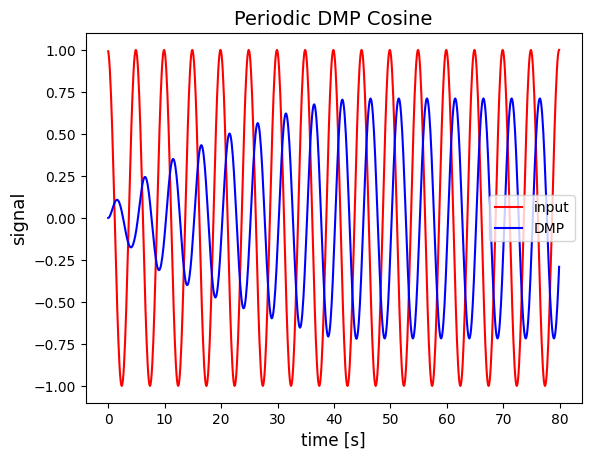

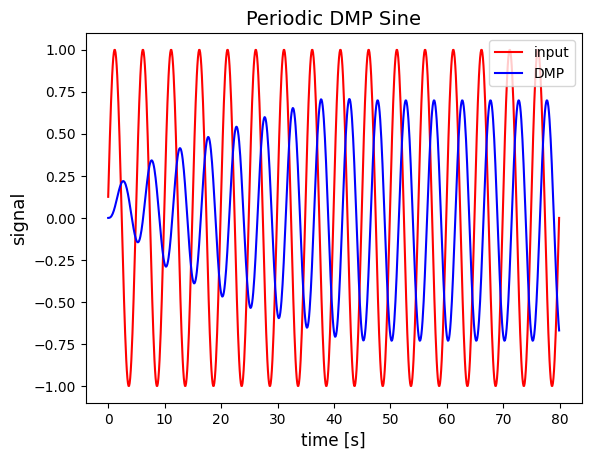

In [ ]:
# Mode = 2 with update code. Alpha = 8. Beta = 2

import numpy as np
import matplotlib.pyplot as plt
from pDMP_functions import pDMP




# EXPERIMENT PARAMETERS
dt = 0.1 # system sample time
exp_time = 80 # total experiment time
samples = int(1/dt) * exp_time

DOF = 4 # degrees of freedom (number of DMPs to be learned)
N = 25 # number of weights per DMP (more weights can reproduce more complicated shapes)
alpha = 8 # DMP gain alpha
beta = 2 # DMP gain beta
lambd = 0.995 # forgetting factor
tau = 5 # DMP time period = 1/frequency (NOTE: this is the frequency of a periodic DMP)
phi = 0 # DMP phase

mode = 2 # DMP mode of operation (see below for details)

y_old = 0
dy_old = 0

data = []
data2 = []
# create a DMP object
myDMP = pDMP(DOF, N, alpha, beta, lambd, dt)




# MAIN LOOP
for i in range ( samples ):

    # generate phase
    phi += 2*np.pi * dt/tau

    # generate an example trajectory (e.g., the movement that is to be learned)
    y = np.array([np.sin(phi), np.cos(phi), -np.sin(phi), -np.cos(phi)])
    # calculate time derivatives
    dy = (y - y_old) / dt
    ddy = (dy - dy_old) / dt

    # generate an example update (e.g., EMG singals that update exoskeleton joint torques as in [Peternel, 2016])
    U = 10*y # typically update factor is an input signal multiplied by a gain

    # set phase and period for DMPs
    myDMP.set_phase( np.array([phi,phi,phi,phi]) )
    myDMP.set_period( np.array([tau,tau,tau,tau]) )



    # DMP mode of operation
    if i < int( 0.5 * samples ): # learn/update for half of the experiment time, then repeat that DMP until the end
        if( mode == 1 ):
            myDMP.learn(y, dy, ddy) # learn DMP based on a trajectory
        elif ( mode == 2 ):
            myDMP.update(U) # update DMP based on an update factor
    else:
        myDMP.repeat() # repeat the learned DMP

    # DMP integration
    myDMP.integration()


    # old values
    y_old = y
    dy_old = dy

    # store data for plotting
    x, dx, ph, ta = myDMP.get_state()
    time = dt*i
    data.append([time,phi,x[1],y[1]])
    data2.append([time,phi,x[0],y[0]])




# PLOTS
data = np.asarray(data)
data2 = np.asarray(data2)
# input
plt.figure(1)
plt.plot(data[:,0],data[:,3],'r')
# DMP
plt.plot(data[:,0],data[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Cosine', fontsize='14')
plt.figure(2)

# input
plt.plot(data2[:,0],data2[:,3],'r')
# DMP
plt.plot(data2[:,0],data2[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Sine', fontsize='14')

Text(0.5, 1.0, 'Periodic DMP Sine')

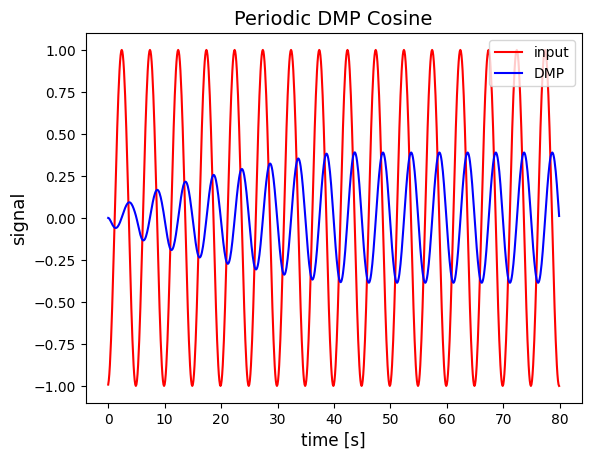

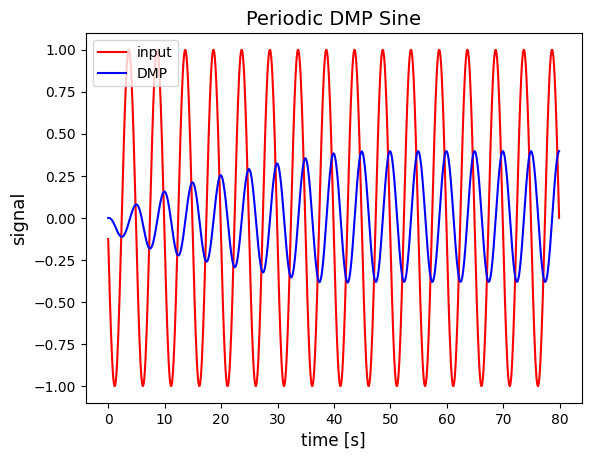

In [ ]:
# Mode = 2 with update code. Alpha = 16. Beta = 2
# Alpha shrunk the amplitude by nearly a factor of 2.
# Alpha was increased by a factor of 2
import numpy as np
import matplotlib.pyplot as plt
from pDMP_functions import pDMP




# EXPERIMENT PARAMETERS
dt = 0.1 # system sample time
exp_time = 80 # total experiment time
samples = int(1/dt) * exp_time

DOF = 4 # degrees of freedom (number of DMPs to be learned)
N = 25 # number of weights per DMP (more weights can reproduce more complicated shapes)
alpha = 16 # DMP gain alpha
beta = 2 # DMP gain beta
lambd = 0.995 # forgetting factor
tau = 5 # DMP time period = 1/frequency (NOTE: this is the frequency of a periodic DMP)
phi = 0 # DMP phase

mode = 2 # DMP mode of operation (see below for details)

y_old = 0
dy_old = 0

data = []
data2 = []
# create a DMP object
myDMP = pDMP(DOF, N, alpha, beta, lambd, dt)




# MAIN LOOP
for i in range ( samples ):

    # generate phase
    phi += 2*np.pi * dt/tau

    # generate an example trajectory (e.g., the movement that is to be learned)
    y = np.array([np.sin(phi), np.cos(phi), -np.sin(phi), -np.cos(phi)])
    # calculate time derivatives
    dy = (y - y_old) / dt
    ddy = (dy - dy_old) / dt

    # generate an example update (e.g., EMG singals that update exoskeleton joint torques as in [Peternel, 2016])
    U = 10*y # typically update factor is an input signal multiplied by a gain

    # set phase and period for DMPs
    myDMP.set_phase( np.array([phi,phi,phi,phi]) )
    myDMP.set_period( np.array([tau,tau,tau,tau]) )



    # DMP mode of operation
    if i < int( 0.5 * samples ): # learn/update for half of the experiment time, then repeat that DMP until the end
        if( mode == 1 ):
            myDMP.learn(y, dy, ddy) # learn DMP based on a trajectory
        elif ( mode == 2 ):
            myDMP.update(U) # update DMP based on an update factor
    else:
        myDMP.repeat() # repeat the learned DMP

    # DMP integration
    myDMP.integration()


    # old values
    y_old = y
    dy_old = dy

    # store data for plotting
    x, dx, ph, ta = myDMP.get_state()
    time = dt*i
    data.append([time,phi,x[1],y[1]])
    data2.append([time,phi,x[0],y[0]])




# PLOTS
data = np.asarray(data)
data2 = np.asarray(data2)
# input
plt.figure(1)
plt.plot(data[:,0],data[:,3],'r')
# DMP
plt.plot(data[:,0],data[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Cosine', fontsize='14')
plt.figure(2)

# input
plt.plot(data2[:,0],data2[:,3],'r')
# DMP
plt.plot(data2[:,0],data2[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Sine', fontsize='14')

Text(0.5, 1.0, 'Periodic DMP Sine')

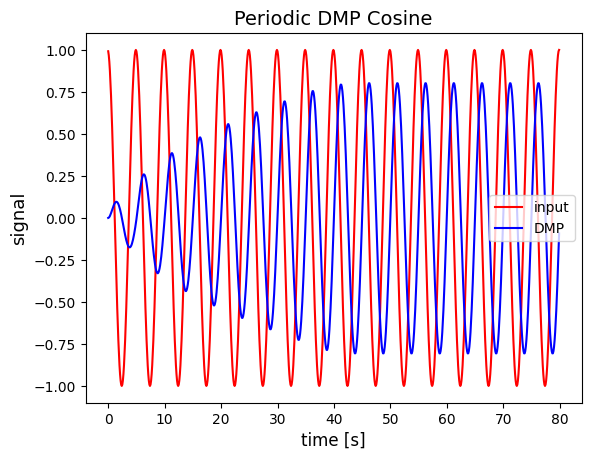

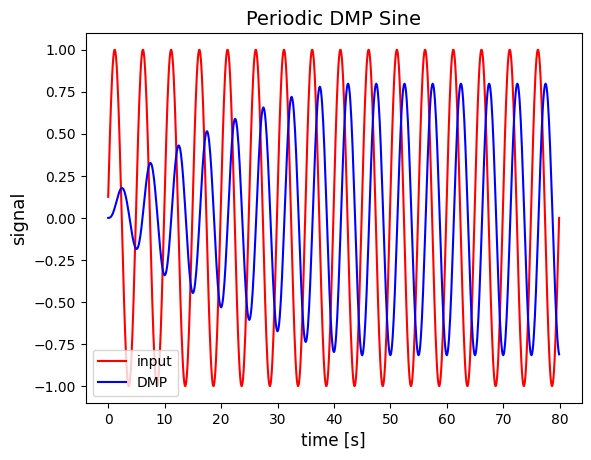

In [ ]:
# Mode = 2 with update code. Alpha = 8. Beta = 4

import numpy as np
import matplotlib.pyplot as plt
from pDMP_functions import pDMP




# EXPERIMENT PARAMETERS
dt = 0.1 # system sample time
exp_time = 80 # total experiment time
samples = int(1/dt) * exp_time

DOF = 4 # degrees of freedom (number of DMPs to be learned)
N = 25 # number of weights per DMP (more weights can reproduce more complicated shapes)
alpha = 8 # DMP gain alpha
beta = 4 # DMP gain beta
lambd = 0.995 # forgetting factor
tau = 5 # DMP time period = 1/frequency (NOTE: this is the frequency of a periodic DMP)
phi = 0 # DMP phase

mode = 2 # DMP mode of operation (see below for details)

y_old = 0
dy_old = 0

data = []
data2 = []
# create a DMP object
myDMP = pDMP(DOF, N, alpha, beta, lambd, dt)




# MAIN LOOP
for i in range ( samples ):

    # generate phase
    phi += 2*np.pi * dt/tau

    # generate an example trajectory (e.g., the movement that is to be learned)
    y = np.array([np.sin(phi), np.cos(phi), -np.sin(phi), -np.cos(phi)])
    # calculate time derivatives
    dy = (y - y_old) / dt
    ddy = (dy - dy_old) / dt

    # generate an example update (e.g., EMG singals that update exoskeleton joint torques as in [Peternel, 2016])
    U = 10*y # typically update factor is an input signal multiplied by a gain

    # set phase and period for DMPs
    myDMP.set_phase( np.array([phi,phi,phi,phi]) )
    myDMP.set_period( np.array([tau,tau,tau,tau]) )



    # DMP mode of operation
    if i < int( 0.5 * samples ): # learn/update for half of the experiment time, then repeat that DMP until the end
        if( mode == 1 ):
            myDMP.learn(y, dy, ddy) # learn DMP based on a trajectory
        elif ( mode == 2 ):
            myDMP.update(U) # update DMP based on an update factor
    else:
        myDMP.repeat() # repeat the learned DMP

    # DMP integration
    myDMP.integration()


    # old values
    y_old = y
    dy_old = dy

    # store data for plotting
    x, dx, ph, ta = myDMP.get_state()
    time = dt*i
    data.append([time,phi,x[1],y[1]])
    data2.append([time,phi,x[0],y[0]])




# PLOTS
data = np.asarray(data)
data2 = np.asarray(data2)
# input
plt.figure(1)
plt.plot(data[:,0],data[:,3],'r')
# DMP
plt.plot(data[:,0],data[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Cosine', fontsize='14')
plt.figure(2)

# input
plt.plot(data2[:,0],data2[:,3],'r')
# DMP
plt.plot(data2[:,0],data2[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Sine', fontsize='14')

Text(0.5, 1.0, 'Periodic DMP Sine')

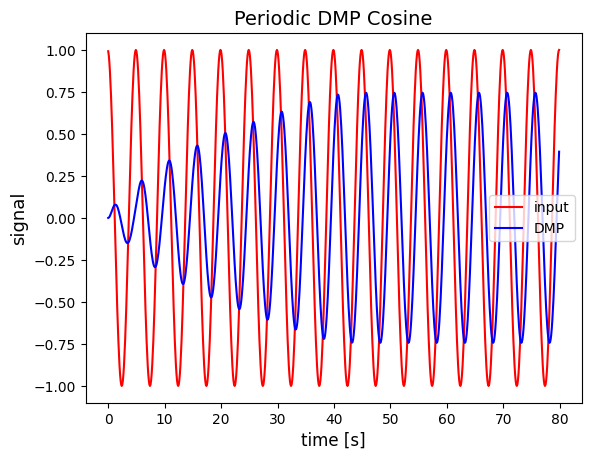

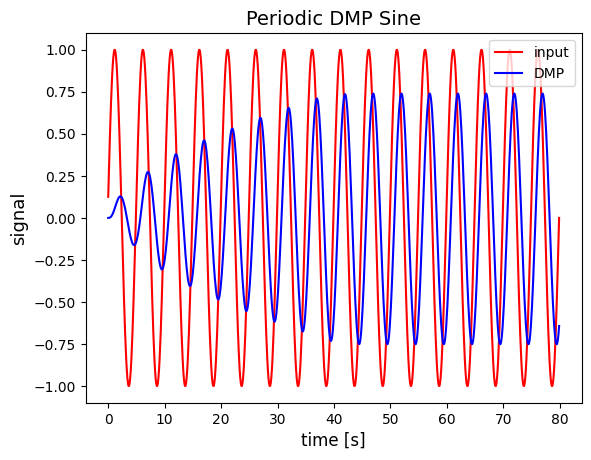

In [ ]:
# Mode = 2 with update code. Alpha = 8. Beta = 8
#Beta 4-->8 does not seem to change the plot
import numpy as np
import matplotlib.pyplot as plt
from pDMP_functions import pDMP




# EXPERIMENT PARAMETERS
dt = 0.1 # system sample time
exp_time = 80 # total experiment time
samples = int(1/dt) * exp_time

DOF = 4 # degrees of freedom (number of DMPs to be learned)
N = 25 # number of weights per DMP (more weights can reproduce more complicated shapes)
alpha = 8 # DMP gain alpha
beta = 8 # DMP gain beta
lambd = 0.995 # forgetting factor
tau = 5 # DMP time period = 1/frequency (NOTE: this is the frequency of a periodic DMP)
phi = 0 # DMP phase

mode = 2 # DMP mode of operation (see below for details)

y_old = 0
dy_old = 0

data = []
data2 = []
# create a DMP object
myDMP = pDMP(DOF, N, alpha, beta, lambd, dt)




# MAIN LOOP
for i in range ( samples ):

    # generate phase
    phi += 2*np.pi * dt/tau

    # generate an example trajectory (e.g., the movement that is to be learned)
    y = np.array([np.sin(phi), np.cos(phi), -np.sin(phi), -np.cos(phi)])
    # calculate time derivatives
    dy = (y - y_old) / dt
    ddy = (dy - dy_old) / dt

    # generate an example update (e.g., EMG singals that update exoskeleton joint torques as in [Peternel, 2016])
    U = 10*y # typically update factor is an input signal multiplied by a gain

    # set phase and period for DMPs
    myDMP.set_phase( np.array([phi,phi,phi,phi]) )
    myDMP.set_period( np.array([tau,tau,tau,tau]) )



    # DMP mode of operation
    if i < int( 0.5 * samples ): # learn/update for half of the experiment time, then repeat that DMP until the end
        if( mode == 1 ):
            myDMP.learn(y, dy, ddy) # learn DMP based on a trajectory
        elif ( mode == 2 ):
            myDMP.update(U) # update DMP based on an update factor
    else:
        myDMP.repeat() # repeat the learned DMP

    # DMP integration
    myDMP.integration()


    # old values
    y_old = y
    dy_old = dy

    # store data for plotting
    x, dx, ph, ta = myDMP.get_state()
    time = dt*i
    data.append([time,phi,x[1],y[1]])
    data2.append([time,phi,x[0],y[0]])




# PLOTS
data = np.asarray(data)
data2 = np.asarray(data2)
# input
plt.figure(1)
plt.plot(data[:,0],data[:,3],'r')
# DMP
plt.plot(data[:,0],data[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Cosine', fontsize='14')
plt.figure(2)

# input
plt.plot(data2[:,0],data2[:,3],'r')
# DMP
plt.plot(data2[:,0],data2[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Sine', fontsize='14')

Text(0.5, 1.0, 'Periodic DMP Sine')

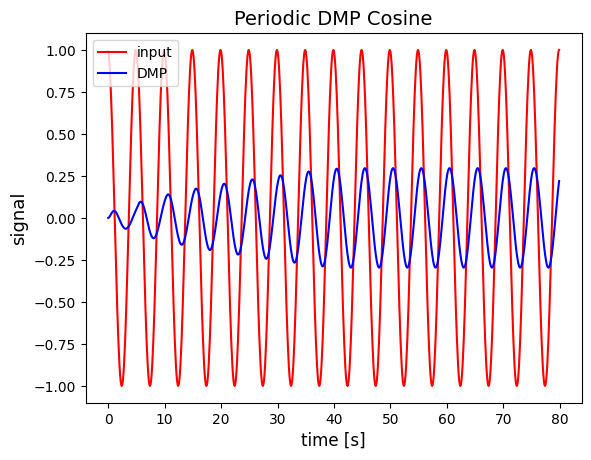

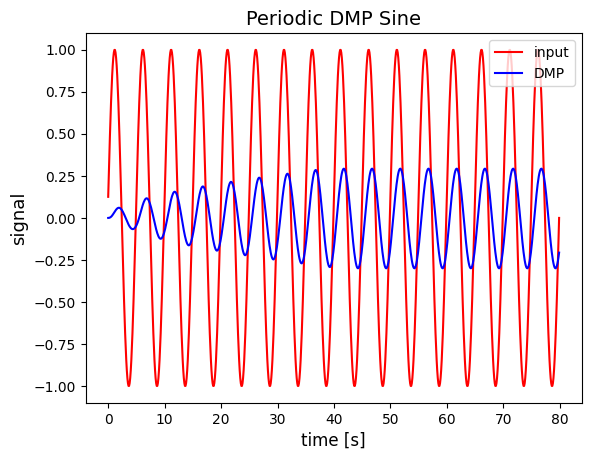

In [ ]:
# Mode = 2 with update code. Alpha = 16. Beta = 8
#Beta 4-->8 does not seem to change the plot
import numpy as np
import matplotlib.pyplot as plt
from pDMP_functions import pDMP




# EXPERIMENT PARAMETERS
dt = 0.1 # system sample time
exp_time = 80 # total experiment time
samples = int(1/dt) * exp_time

DOF = 4 # degrees of freedom (number of DMPs to be learned)
N = 25 # number of weights per DMP (more weights can reproduce more complicated shapes)
alpha = 16 # DMP gain alpha
beta = 8 # DMP gain beta
lambd = 0.995 # forgetting factor
tau = 5 # DMP time period = 1/frequency (NOTE: this is the frequency of a periodic DMP)
phi = 0 # DMP phase

mode = 2 # DMP mode of operation (see below for details)

y_old = 0
dy_old = 0

data = []
data2 = []
# create a DMP object
myDMP = pDMP(DOF, N, alpha, beta, lambd, dt)




# MAIN LOOP
for i in range ( samples ):

    # generate phase
    phi += 2*np.pi * dt/tau

    # generate an example trajectory (e.g., the movement that is to be learned)
    y = np.array([np.sin(phi), np.cos(phi), -np.sin(phi), -np.cos(phi)])
    # calculate time derivatives
    dy = (y - y_old) / dt
    ddy = (dy - dy_old) / dt

    # generate an example update (e.g., EMG singals that update exoskeleton joint torques as in [Peternel, 2016])
    U = 10*y # typically update factor is an input signal multiplied by a gain

    # set phase and period for DMPs
    myDMP.set_phase( np.array([phi,phi,phi,phi]) )
    myDMP.set_period( np.array([tau,tau,tau,tau]) )



    # DMP mode of operation
    if i < int( 0.5 * samples ): # learn/update for half of the experiment time, then repeat that DMP until the end
        if( mode == 1 ):
            myDMP.learn(y, dy, ddy) # learn DMP based on a trajectory
        elif ( mode == 2 ):
            myDMP.update(U) # update DMP based on an update factor
    else:
        myDMP.repeat() # repeat the learned DMP

    # DMP integration
    myDMP.integration()


    # old values
    y_old = y
    dy_old = dy

    # store data for plotting
    x, dx, ph, ta = myDMP.get_state()
    time = dt*i
    data.append([time,phi,x[1],y[1]])
    data2.append([time,phi,x[0],y[0]])




# PLOTS
data = np.asarray(data)
data2 = np.asarray(data2)
# input
plt.figure(1)
plt.plot(data[:,0],data[:,3],'r')
# DMP
plt.plot(data[:,0],data[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Cosine', fontsize='14')
plt.figure(2)

# input
plt.plot(data2[:,0],data2[:,3],'r')
# DMP
plt.plot(data2[:,0],data2[:,2],'b')

plt.xlabel('time [s]', fontsize='12')
plt.ylabel('signal', fontsize='13')

plt.legend(['input','DMP'])

plt.title('Periodic DMP Sine', fontsize='14')